# **Crime In LA**
## Data CSV from kaggle, provided by the LAPD 

In my project, I explored my data and learned a lot along the way on how to code and use the data correctly. As the professor had once said in class, I used the "shoulders of giants" to help analyze my data. Throughout the semester, learning how to navigate pandas dataframe has been very fun and challenging, however a lot of learning and googling helped me. Specifically, for this project, I used the help of Kaggle and StackOverFlow to help me on syntax and coding. 




# LETS BEGIN BY EXPLORING MY DATA

printing out raw dataframe



In [120]:
import pandas as pd 
import numpy as np
df = pd.read_csv("crime_in_la.csv")
df.head()

DR_NO    DATE OCC TIME OCC  AREA    AREA NAME  Rpt Dist No  Crm Cd  \
0   10304468  08/01/2020    22:30     3    Southwest          377     624   
1  190101086  01/01/2020    03:30     1      Central          163     624   
2  191501505  01/01/2020    17:30    15  N Hollywood         1543     745   
3  191921269  01/01/2020    04:15    19      Mission         1998     740   
4  200100501  01/01/2020    00:30     1      Central          163     121   

                                         Crm Cd Desc              Mocodes  \
0                           BATTERY - SIMPLE ASSAULT            0444 0913   
1                           BATTERY - SIMPLE ASSAULT       0416 1822 1414   
2           VANDALISM - MISDEAMEANOR ($399 OR UNDER)            0329 1402   
3  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...                 0329   
4                                     RAPE, FORCIBLE  0413 1822 1262 1415   

   Vict Age Vict Sex Vict Descent  \
0        36        F            B   
1        25        M            H   
2        76        F            W   
3        31        X            X   
4        25        F            H   

                                    Premis Desc  Weapon Used Cd  \
0                        SINGLE FAMILY DWELLING           400.0   
1                                      SIDEWALK           500.0   
2  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)           500.0   
3                           BEAUTY SUPPLY STORE           500.0   
4               NIGHT CLUB (OPEN EVENINGS ONLY)           500.0   

                                      Weapon Desc Status  Status Desc  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO  Adult Other   
1                     UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
2                     UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
3                     UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   
4                     UNKNOWN WEAPON/OTHER WEAPON     IC  Invest Cont   

                                   LOCATION      LAT       LON  
0   1100 W  39TH                         PL  34.0141 -118.2978  
1    700 S  HILL                         ST  34.0459 -118.2545  
2   5400    CORTEEN                      PL  34.1685 -118.4019  
3  14400    TITUS                        ST  34.2198 -118.4468  
4                           700 S  BROADWAY  34.0452 -118.2534

In [142]:
# get AREA NAME and create a counter for occurance
# Can pick any other variable from df to act as counter...lets pick AREA
area_df = df[['AREA','AREA NAME']]
areaCounter = area_df.groupby('AREA NAME').agg(['count'])
areaCounter.head(5)
areaCounter.reset_index(inplace=True)

areaCounter.columns = areaCounter.columns.droplevel(level=1)
areaCounter.rename(columns={"AREA": "Crime Count"}, inplace=True)

areaCounter['AREA NAME'].loc[areaCounter['AREA NAME']=='Olympic'] = 'Olympic'
areaCounter.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AREA NAME  Crime Count
0  77th Street        29859
1      Central        29209
2   Devonshire        18586
3     Foothill        16075
4       Harbor        20129

#**Analyzing Data Through Bar Graph Visualizations**

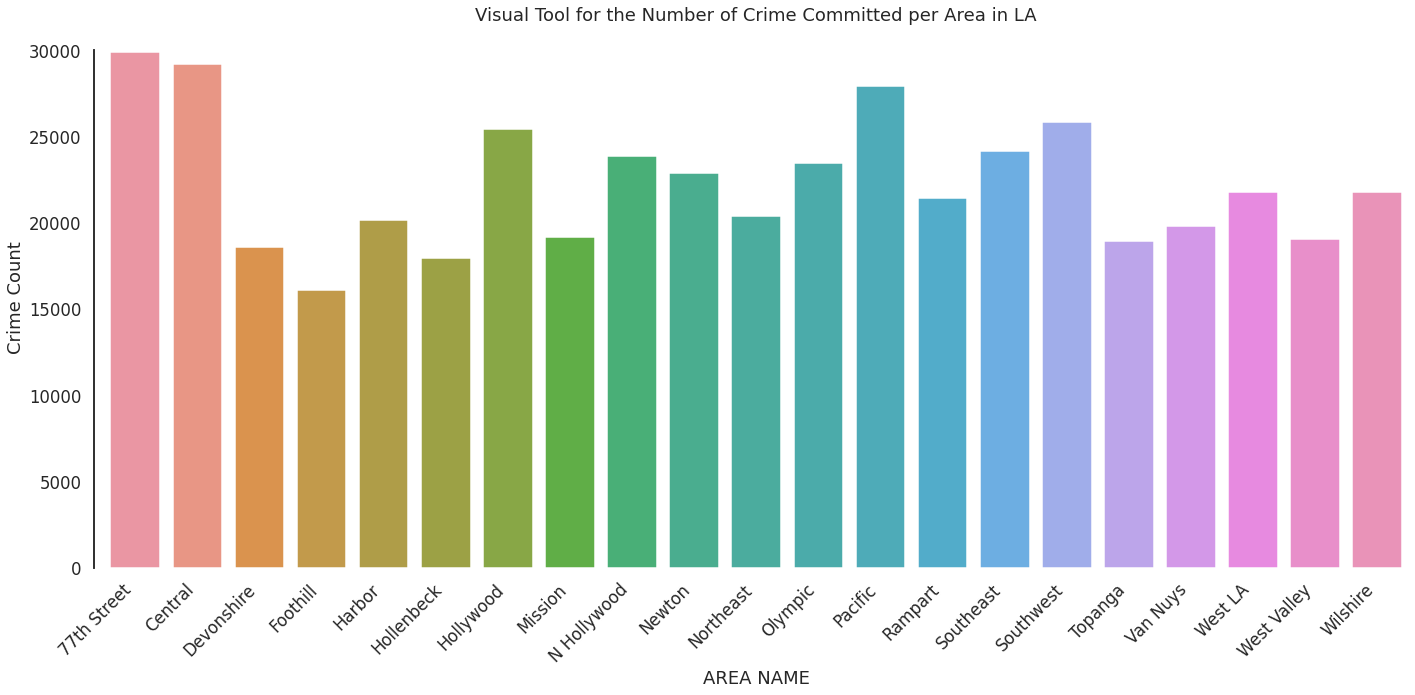

In [140]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

plt.figure(figsize=(20, 10))

# set up color scheme
sns.set(style="white", context="talk", palette="rocket")

# plot data into bar graph
sns.barplot(data=areaCounter,x=areaCounter["AREA NAME"],y=areaCounter["Crime Count"],).set(title='Visual Tool for the Number of Crime Committed per Area in LA')
plt.xticks(rotation=45, ha='right')
sns.despine(offset=10, trim=True, bottom=True)

plt.tight_layout(h_pad=2)

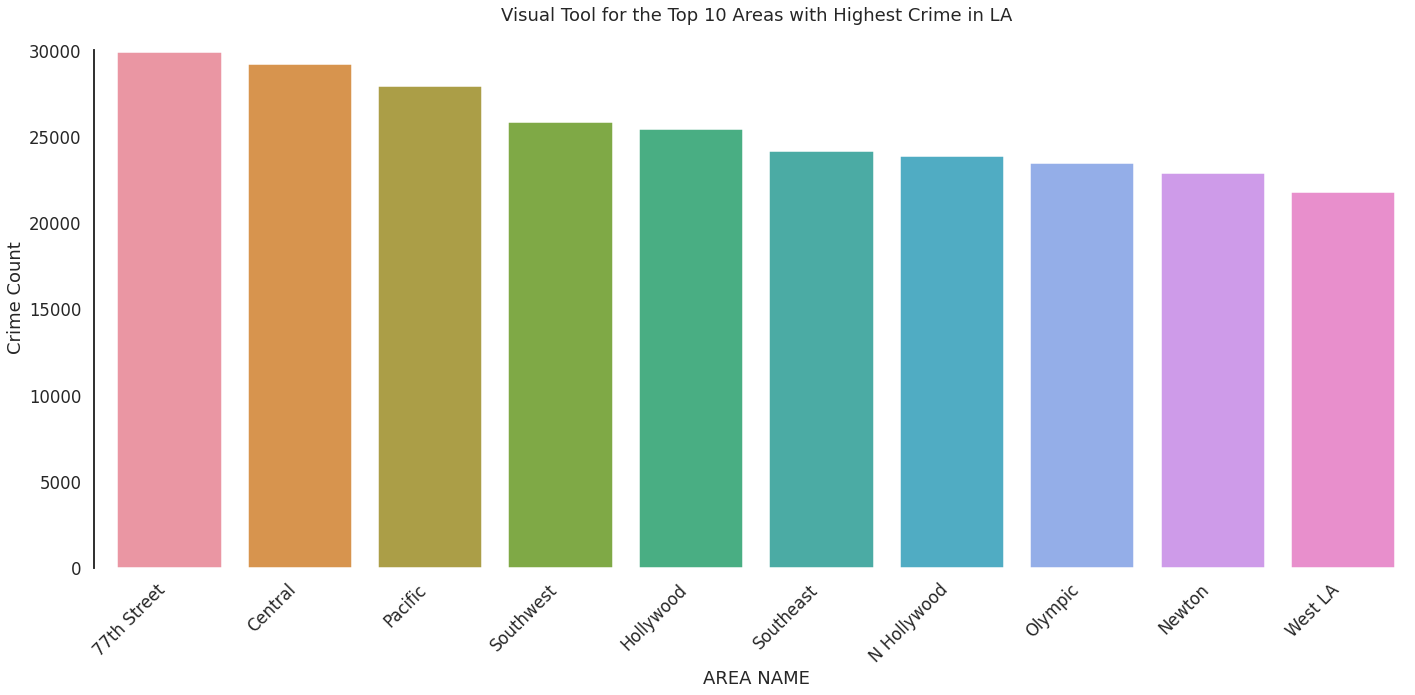

In [144]:
# DO SAME THING BUT FOR TOP 10 AREAS 
data= areaCounter.head(10)
data

#grab top 10 most hit areas
top_10 = areaCounter.sort_values(by="Crime Count", ascending=False).head(10)
top_10

plt.figure(figsize=(20, 10))

sns.set(style="white", context="talk", palette="rocket")
sns.barplot(data=top_10,x=top_10["AREA NAME"],y=top_10["Crime Count"],).set(title='Visual Tool for the Top 10 Areas with Highest Crime in LA')

plt.xticks(rotation=45, ha='right')
sns.despine(offset=10, trim=True, bottom=True)

plt.tight_layout(h_pad=2)

In [145]:
test = crimeData[['AREA NAME','Crm Cd Desc']]
test

AREA NAME                                        Crm Cd Desc
0         Southwest                           BATTERY - SIMPLE ASSAULT
1           Central                           BATTERY - SIMPLE ASSAULT
2       N Hollywood           VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3           Mission  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
4           Central                                     RAPE, FORCIBLE
...             ...                                                ...
467649      Mission  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
467650      Mission                 THEFT FROM MOTOR VEHICLE - ATTEMPT
467651  West Valley                                   VEHICLE - STOLEN
467652    Northeast                                   VEHICLE - STOLEN
467653     Foothill  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...

[467654 rows x 2 columns]

[]

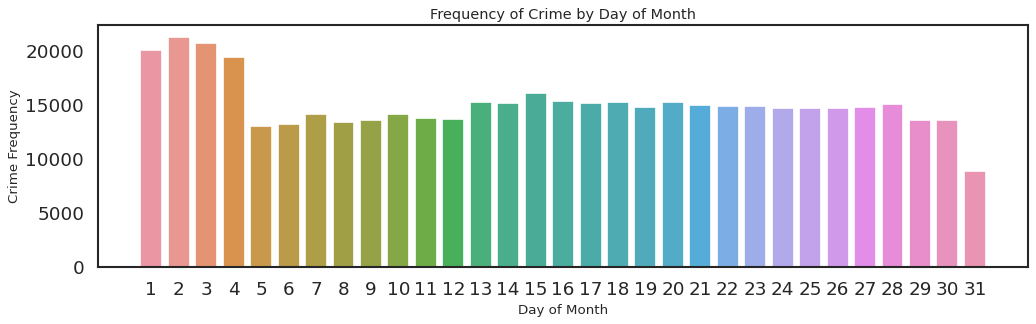

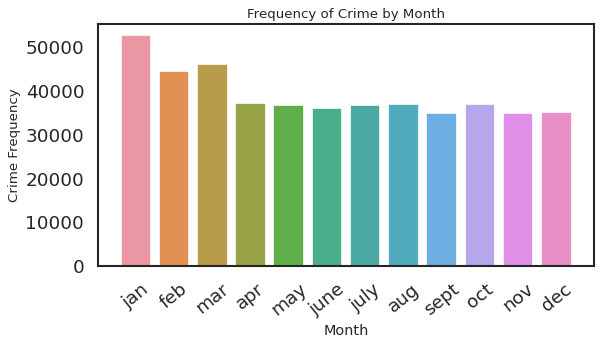

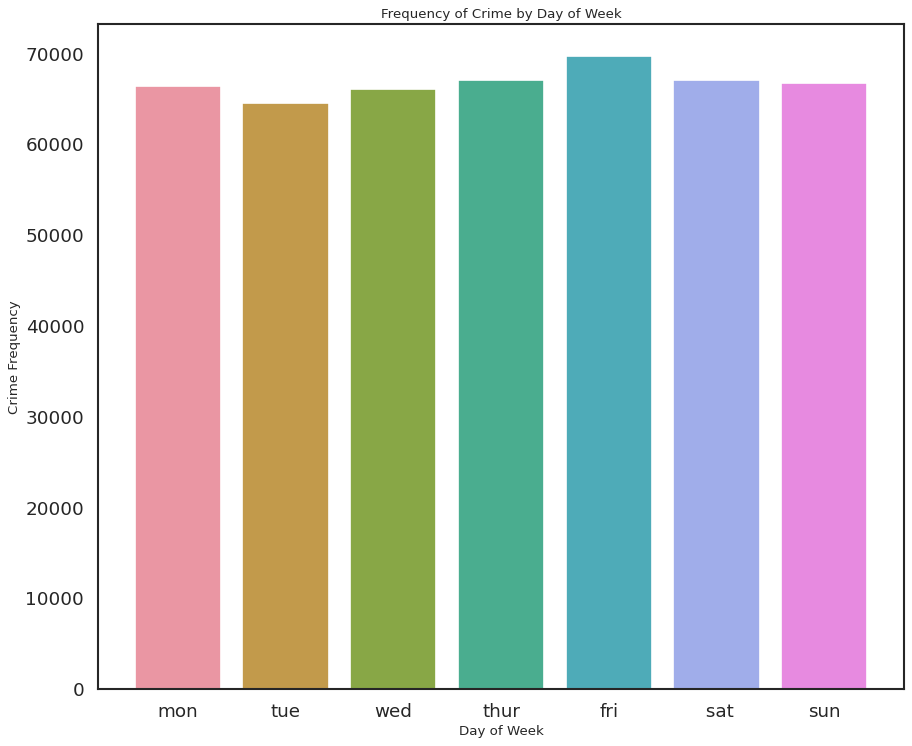

In [151]:
# cleaning up data values from mo/da/year to individual values
df['Date'] = df['DATE OCC']
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.weekday + 1
df['Hour'] = df['Date'].dt.hour
# BY DATE
plt.figure(figsize=(15,4), dpi=80)
plt.title('Frequency of Crime by Day of Month', fontsize=13)
ax = sns.countplot(x = 'Day', data = df)
plt.ylabel("Crime Frequency", fontsize=12)
plt.xlabel('Day of Month', fontsize=12)
plt.plot()
# BY MONTH
print()
plt.figure(figsize=(8,4), dpi=80)
plt.title('Frequency of Crime by Month', fontsize=12)
ax = sns.countplot(x = 'Month', data = df)
plt.ylabel("Crime Frequency", fontsize=12)
plt.xlabel('Month', fontsize=13)
plt.xticks(rotation = 39)
labels = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec'] 
ax.set_xticklabels(labels)
plt.plot()
# DAY OF WEEK 
plt.figure(figsize=(13,11), dpi=80)
plt.title('Frequency of Crime by Day of Week', fontsize=12)
ax = sns.countplot(x = 'Weekday', data = df)
plt.ylabel("Crime Frequency", fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
labels = ['mon', 'tue', 'wed', 'thur', 'fri',' sat', 'sun']
ax.set_xticklabels(labels)
plt.plot()

[]

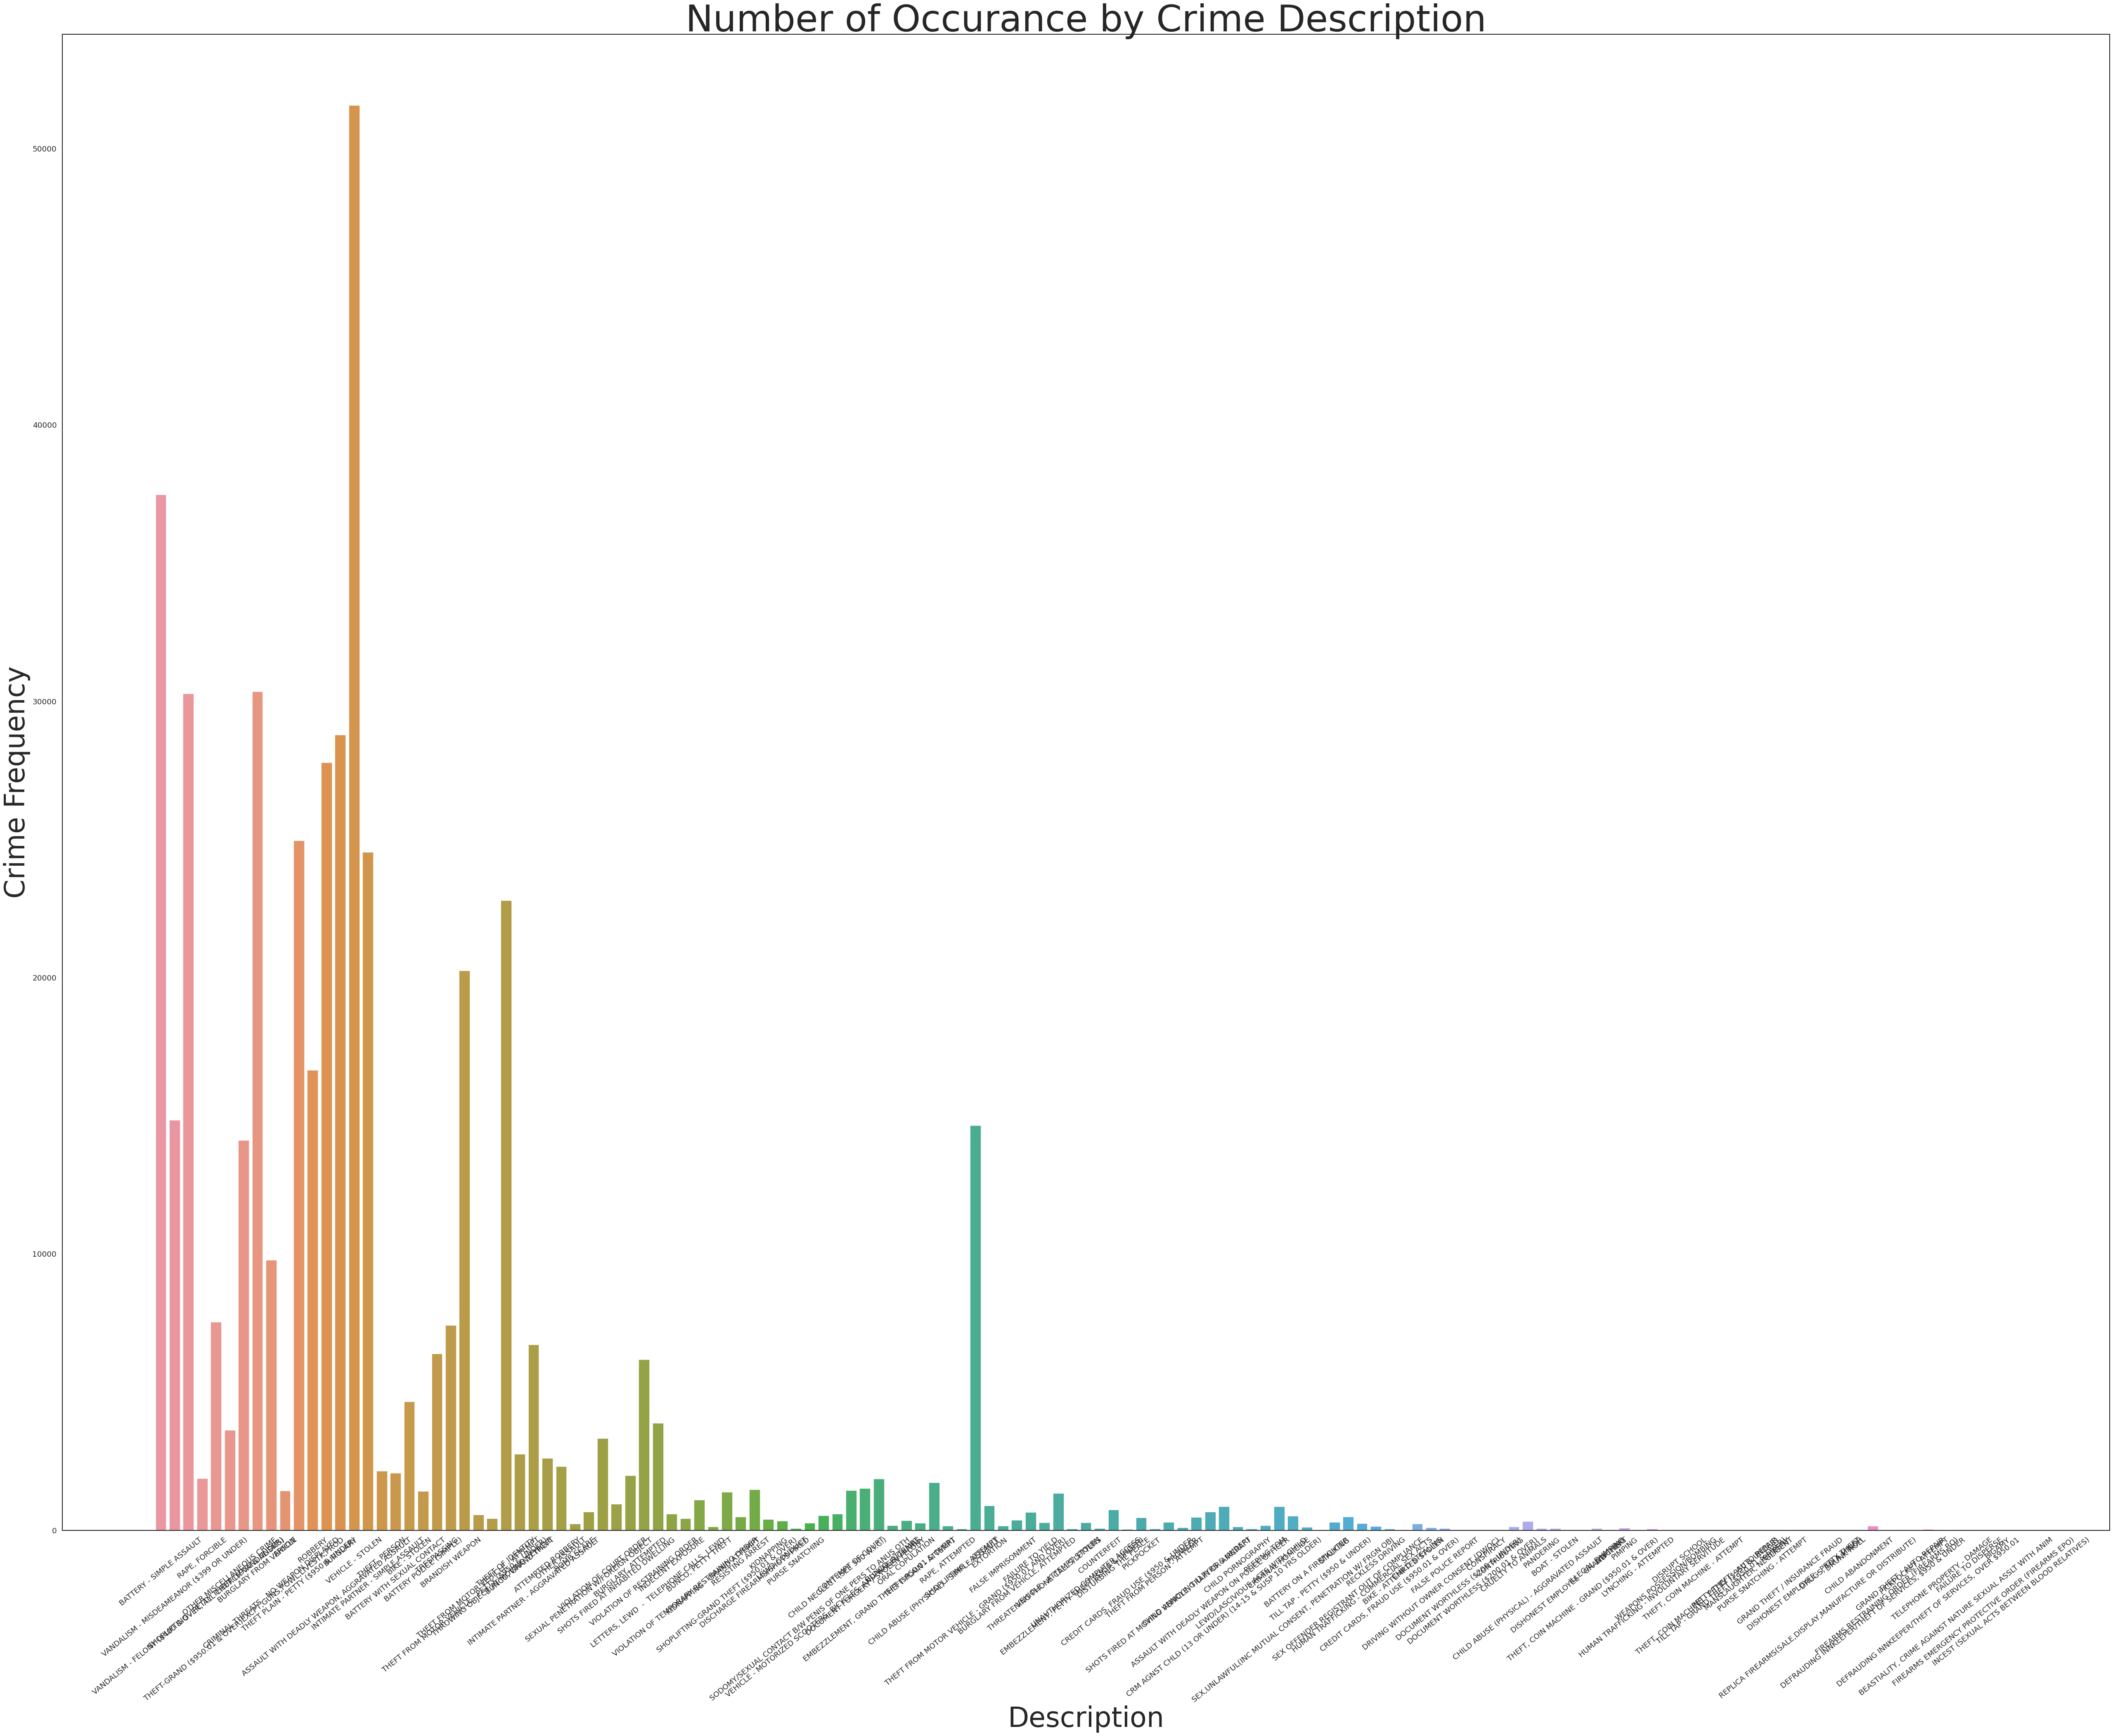

In [154]:
plt.figure(figsize=(80,60), dpi=80)
plt.title('Number of Occurance by Crime Description', fontsize=80)
ax = sns.countplot(x = 'Crm Cd Desc', data = df)
plt.ylabel("Crime Frequency", fontsize=60)
plt.xlabel('Description', fontsize=60)
plt.xticks(rotation = 39)
plt.plot()

**BECAUSE GRAPH IS HARD TO READ!!**
Here is a wordCloud of the most frequent type of crime code for visual aid

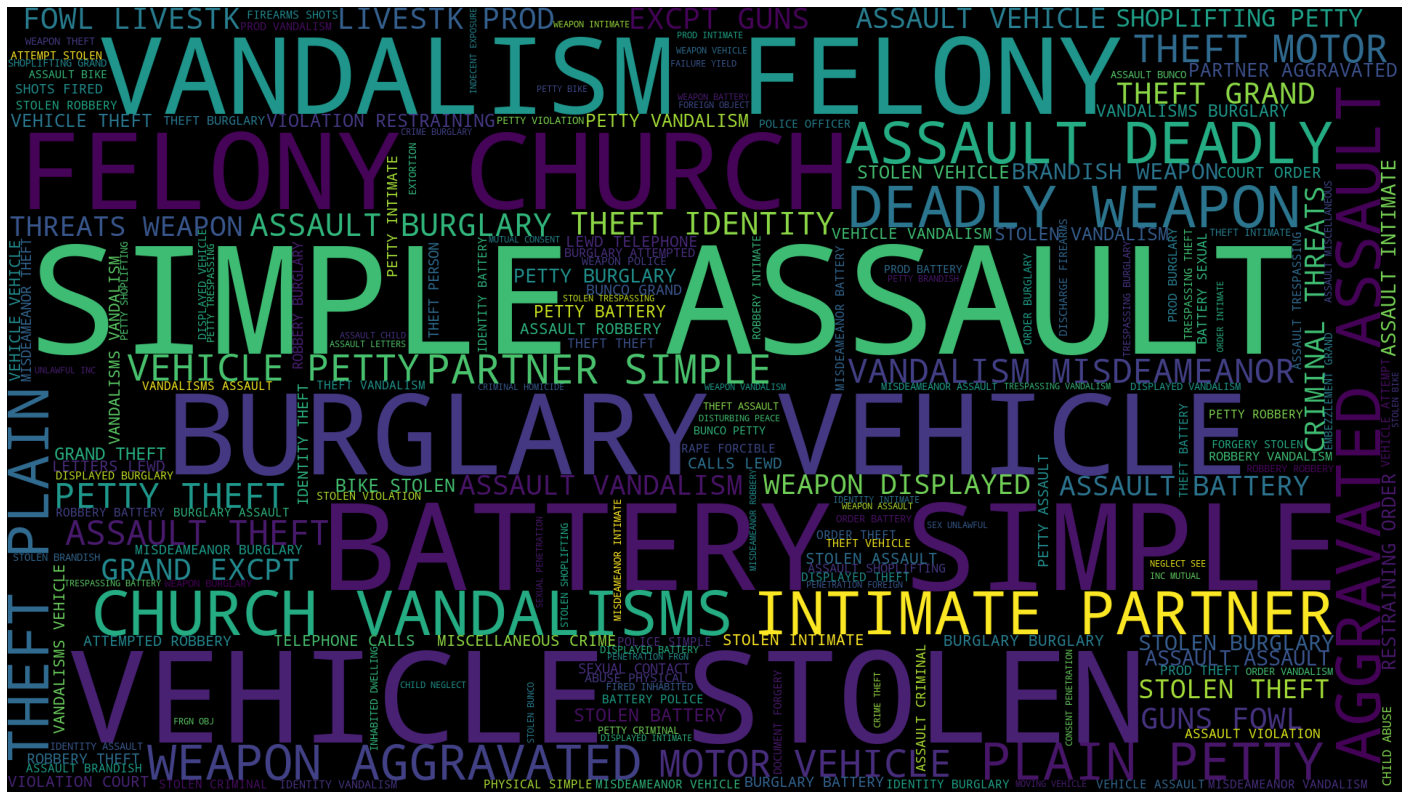

In [35]:
from wordcloud import WordCloud

plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(crimeData['Crm Cd Desc']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

and here is another visual aid for at least 20 diff types of crime codes and their frequencies

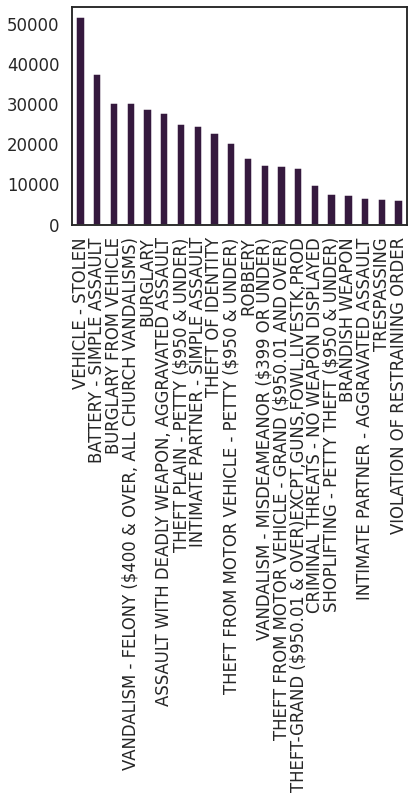

In [160]:
# 20 Diff Crime Code Per Frequency Since Last Chart Is Hard To Read 
df['Crm Cd Desc'].value_counts()[:20].plot(kind='bar')

[]

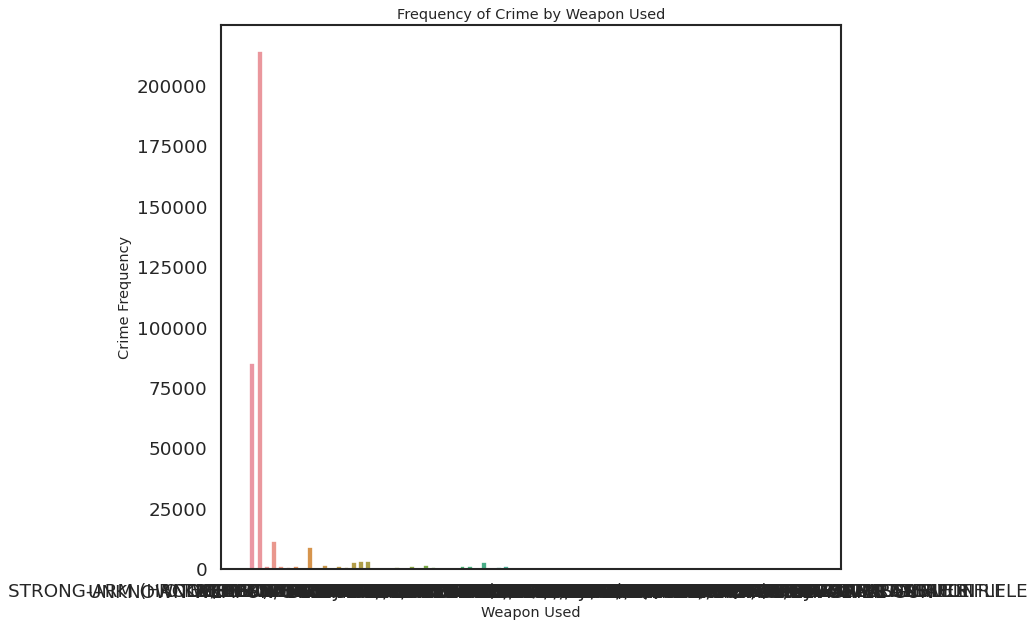

In [171]:
plt.figure(figsize=(10,9), dpi=80)

plt.title('Frequency of Crime by Weapon Used', fontsize=13)
ax = sns.countplot(x = 'Weapon Desc', data = crimeData)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Weapon Used', fontsize=13)
plt.plot()

[]

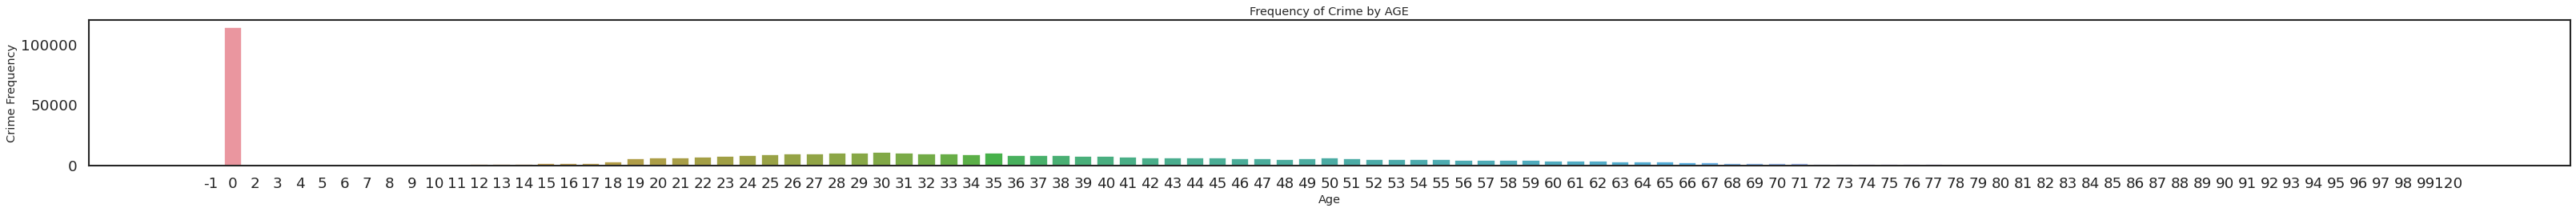

In [98]:
# BY AGE WITH SKEWED OTHER CATEGORY AKA 0 
plt.figure(figsize=(50,3), dpi=80)
plt.title('Frequency of Crime by AGE', fontsize=13)
ax = sns.countplot(x = 'Vict Age', data = crimeData)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.plot()

In [102]:
crimeData['Vict Age']

crimeData.drop(crimeData[crimeData['Vict Age'] <= 0].index, inplace = True)
crimeData['Vict Age']

0         36
1         25
2         76
3         31
4         25
          ..
467646    49
467648    73
467649    37
467650    48
467653    61
Name: Vict Age, Length: 353431, dtype: int64

# **OTHER IS THE LARGEST AGE CATEGORY**
**however, ages between 24-37 are the largest category**

[]

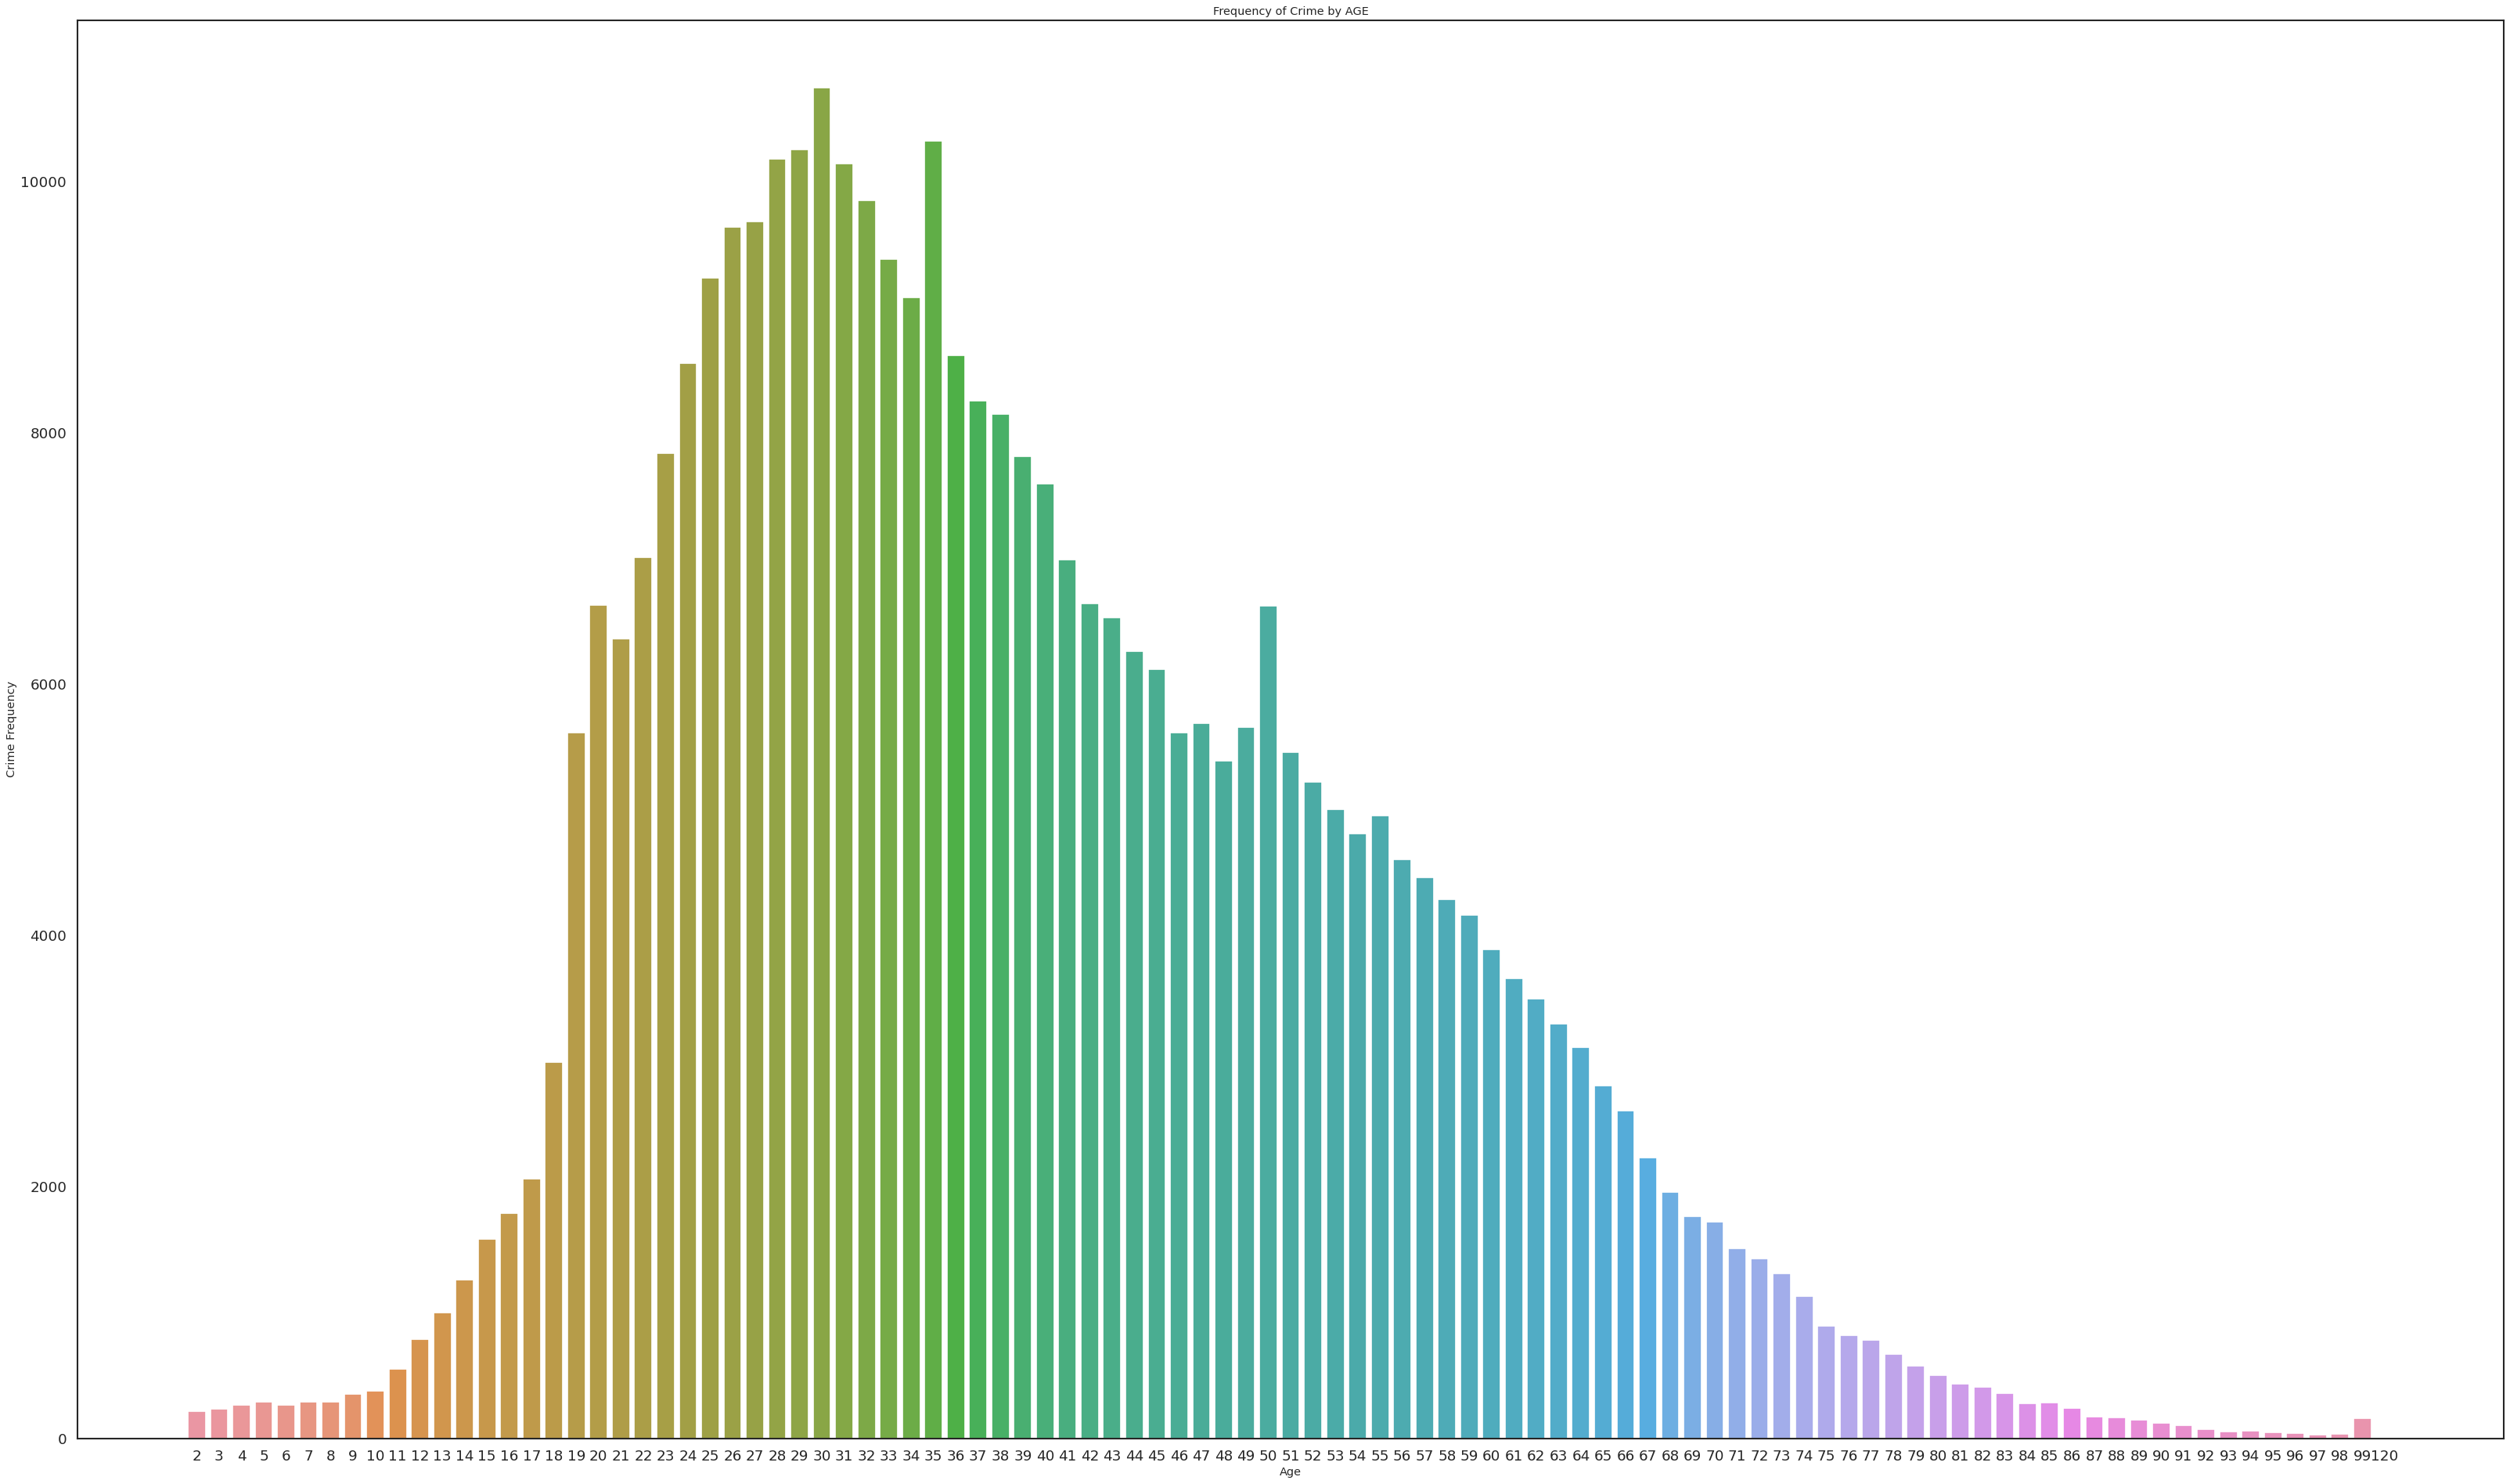

In [106]:
# BY AGE w/out OTHER
plt.figure(figsize=(50,30), dpi=80)

plt.title('Frequency of Crime by AGE', fontsize=13)
ax = sns.countplot(x = 'Vict Age', data = crimeData)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Age', fontsize=13)
plt.plot()

## **MORE MALES ARE ATTACKED THAN FEMALES**

[]

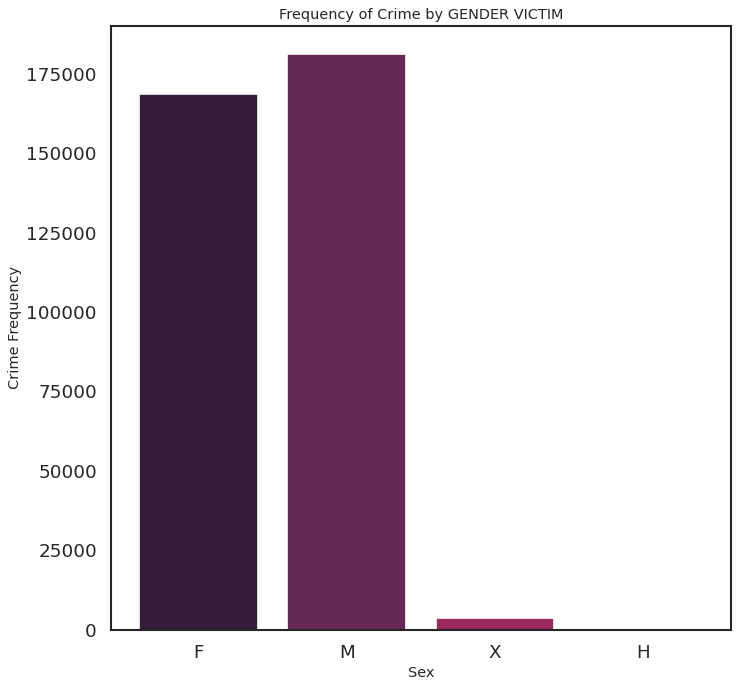

In [172]:
# BY SEX
plt.figure(figsize=(10,10), dpi=80)

plt.title('Frequency of Crime by GENDER VICTIM', fontsize=13)
ax = sns.countplot(x = 'Vict Sex', data = crimeData)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Sex', fontsize=13)
plt.plot()

# **Analyzing Data Through Map Visualization**

In [165]:
import requests
from bs4 import BeautifulSoup
import json  
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import folium 
from sklearn.cluster import KMeans

# get coordinates of LA 
location = 'Los Angeles'
explore_geo = Nominatim(user_agent = "ExploreLA")
pin = explore_geo.geocode(location)
lat = pin.latitude
lon = pin.longitude


myMap = folium.Map(location=[lat, lon],zoom_start=10)
myMap

# **NOTICE HOW BEVERLY HILLS IS EXCLUDED FROM THE HEAT BUBBLE FOR ANY CRIME, AS WELL AS STATE PARKS**

even though both are smack in the middle of hot crime areas, why could this be?

In [166]:
from folium.plugins import HeatMap

##MOST COMMON CRIME 
df['LAT'] = df['LAT'].astype(float)
df['LON'] = df['LON'].astype(float)
df_heatMap = df[df['Crm Cd Desc']=='BATTERY - SIMPLE ASSAULT'] 
data_heatMap = [[row['LAT'],row['LON']] for index, row in df_heatMap.iterrows()]
HeatMap(data_heatMap).add_to(myMap)
myMap

## NOTICE EMPTY AREAS
##BEVERY HILLS, SANTA MONICA, STATE PARKS 

In [167]:
##NOT AS COMMON CRIME 

# second copy of map since I feel like my 
# map is not resetting in heat data 
second_map = folium.Map(location=[lat, lon], zoom_start=13)
second_map

from folium.plugins import HeatMap

df['LAT'] = df['LAT'].astype(float)
df['LON'] = df['LON'].astype(float)
df_heatMap2 = df[df['Crm Cd Desc']=='ASSAULT BATTERY'] 
data_heatMap2 = [[row['LAT'],row['LON']] for index, row in df_heatMap2.iterrows()]
HeatMap(data_heatMap2).add_to(second_map)
second_map

In [112]:
from plotly import express as px

targets = crimeData[crimeData['AREA NAME']=='77th Street']['Weapon Desc'].value_counts().tolist()
values = list(dict(crimeData[crimeData['AREA NAME']=='77th Street']['Weapon Desc'].value_counts()).keys())

fig = px.pie(
    values=targets, 
    names=values,
    title='Weapons Used in Highest Hit Area (77th Street)',
)
fig.show()

In [113]:
targets = crimeData[crimeData['AREA NAME']=='77th Street']['Crm Cd Desc'].value_counts().tolist()
values = list(dict(crimeData[crimeData['AREA NAME']=='77th Street']['Crm Cd Desc'].value_counts()).keys())

fig = px.pie(
    values=targets, 
    names=values,
    title='Types Of Crime in Highest Hit Area (77th Street)',
)
fig.show()

In [118]:
targets = crimeData[crimeData['AREA NAME']=='Beverly Hills']['Crm Cd Desc'].value_counts().tolist()
values = list(dict(crimeData[crimeData['AREA NAME']=='Beverly Hills']['Crm Cd Desc'].value_counts()).keys())

fig = px.pie(
    values=targets, 
    names=values,
    title='Types Of Crime in Outlier on Map (Beverly Hills)',
)
fig.show()

# **RECAP**

Males are targeted more than females, Young Adults are targeted the most, the most common type of crime is simple assualt and vandalism as well as vehicle stolen and burglary. However, State Parks are excluded from this list (which makes sense bc its just woods) but so is Beverly Hills. This might be due to the LAPD not having provision in that area or because of the high class status of areas like beverly hills and santa monica provides for more police protection and security 